In [2]:

from pathlib import Path
import os, sys

ffmpeg_dll_dir = Path(r"D:\Downloads\ffmpeg-7.1.1-full_build-shared\ffmpeg-7.1.1-full_build-shared\bin")  # adjust if your conda root differs
assert ffmpeg_dll_dir.exists(), ffmpeg_dll_dir
os.add_dll_directory(str(ffmpeg_dll_dir))  # Python 3.8+ DLL search

import torch, torchcodec, platform, subprocess
print("exe:", sys.executable)
print("torch", torch.__version__, "torchcodec", torchcodec.__version__, "py", platform.python_version())
subprocess.run(["ffmpeg", "-version"], check=True)

exe: c:\Users\Ashiq\AppData\Local\Programs\Python\Python311\python.exe
torch 2.9.1+cpu torchcodec 0.8.0 py 3.11.9


CompletedProcess(args=['ffmpeg', '-version'], returncode=0)

In [3]:
import datasets

dataset = datasets.load_dataset(
    "m-aliabbas/idrak_timit_subsample1",
    split="train"
)


In [4]:
print(dataset.column_names)

['audio', 'transcription']


In [5]:
data = next(iter(dataset))
audio = data["audio"]["array"]
sample_rate = data["audio"]["sampling_rate"]
transcript = data["transcription"]

In [6]:
data

{'audio': <datasets.features._torchcodec.AudioDecoder at 0x1cbf0300610>,
 'transcription': 'don t ask me to carry an oily rag like that'}

In [7]:
print(audio.shape)
print(sample_rate)
print("Audio length(s): ", audio.size / sample_rate)
print(transcript)

(35840,)
16000
Audio length(s):  2.24
don t ask me to carry an oily rag like that


In [8]:
from IPython.display import Audio
Audio(audio, rate=sample_rate)

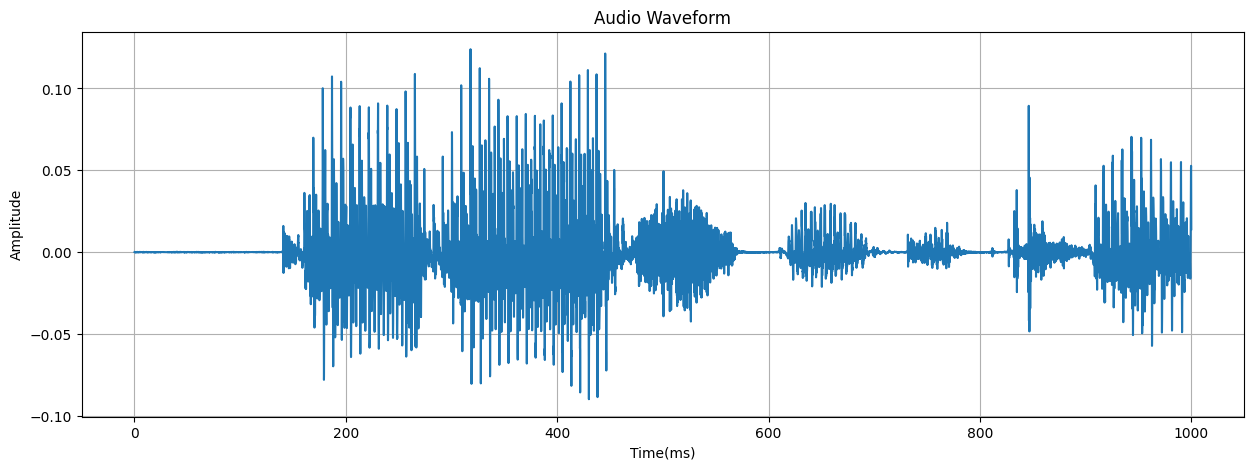

Audio length: 1000.00 ms


In [9]:
import matplotlib.pyplot as plt
import numpy as np

start_time_ms = 0
end_time_ms = 1000

start_idx = int(start_time_ms * sample_rate/ 1000)
end_idx = int(end_time_ms * sample_rate/ 1000)

audio_np = audio[start_idx:end_idx]

time_ms = np.arange(len(audio_np)) * (1000 / sample_rate)

plt.figure(figsize=(15, 5))
plt.plot(time_ms, audio_np)
plt.xlabel('Time(ms)')
plt.ylabel('Amplitude')
plt.title('Audio Waveform')
plt.grid(True)
plt.show()

print(f"Audio length: {len(audio_np) / sample_rate * 1000:.2f} ms")


In [10]:
from tokenizers import Tokenizer, models, pre_tokenizers, decoders

def get_tokenizer(save_path="tokenizer.json"):
    tokenizer = Tokenizer(models.BPE())
    tokenizer.add_special_tokens(["☐"])
    tokenizer.add_tokens(list("ABCDEFGHIJKLMNOPQRSTUVWXYZ '"))

    tokenizer.pre_tokenizer = pre_tokenizers.ByteLevel()
    tokenizer.decoder = decoders.ByteLevel()
    tokenizer.blank_token = tokenizer.token_to_id("☐")
    tokenizer.save(save_path)
    return tokenizer

In [11]:
tokenizer = get_tokenizer()

In [12]:
sorted(tokenizer.get_vocab().items(), key=lambda x:x[1])

[('☐', 0),
 ('A', 1),
 ('B', 2),
 ('C', 3),
 ('D', 4),
 ('E', 5),
 ('F', 6),
 ('G', 7),
 ('H', 8),
 ('I', 9),
 ('J', 10),
 ('K', 11),
 ('L', 12),
 ('M', 13),
 ('N', 14),
 ('O', 15),
 ('P', 16),
 ('Q', 17),
 ('R', 18),
 ('S', 19),
 ('T', 20),
 ('U', 21),
 ('V', 22),
 ('W', 23),
 ('X', 24),
 ('Y', 25),
 ('Z', 26),
 (' ', 27),
 ("'", 28)]

In [13]:
transcript = transcript.upper()
input_ids = tokenizer.encode(transcript)

In [14]:
transcript

'DON T ASK ME TO CARRY AN OILY RAG LIKE THAT'

In [16]:
input_ids.ids

[4,
 15,
 14,
 27,
 20,
 27,
 1,
 19,
 11,
 27,
 13,
 5,
 27,
 20,
 15,
 27,
 3,
 1,
 18,
 18,
 25,
 27,
 1,
 14,
 27,
 15,
 9,
 12,
 25,
 27,
 18,
 1,
 7,
 27,
 12,
 9,
 11,
 5,
 27,
 20,
 8,
 1,
 20]